<a href="https://colab.research.google.com/github/Macsito-prog/Age_recon/blob/main/AgePredictionHunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown

In [4]:
!gdown https://drive.google.com/uc?id=0BxYys69jI14kRjNmM0gyVWM2bHM


Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kRjNmM0gyVWM2bHM
To: /content/crop_part1.tar.gz
45.4MB [00:00, 80.0MB/s]


In [6]:
!tar -xf /content/crop_part1.tar.gz

In [8]:
import os 
import numpy as np
import cv2
import tensorflow as tf

In [10]:
PATH = '/content/crop_part1'

In [15]:
paths = os.listdir(PATH)

In [17]:
len(paths)

9780

In [20]:
labels = np.array([float(path.split('_')[0]) for path in paths])

In [22]:
labels[0]

51.0

In [23]:
def format_image(path):
  img = cv2.imread(PATH + '/' + path)
  img = cv2.resize(img, (128,128))
  return img

In [24]:
data = np.array([format_image(path)for path in paths])

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.2)

In [29]:
from tensorflow.keras.applications import MobileNet

In [31]:
import tensorflow.keras.layers as L

In [33]:
model = tf.keras.Sequential([
                 MobileNet(input_shape=(128,128,3),
                 include_top = False,
                 pooling='avg',
                 weights='imagenet'),
                 L.Dense(1)
])

17227776/17225924 [==============================] - 0s 0us/step


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 1024)              3228864   
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='mae', metrics='mae')

In [37]:
model.fit(
    train_x,
    train_y,
    batch_size= 64,
    epochs=4,
    validation_data=(test_x,test_y)
)

Epoch 1/4
123/123 [==============================] - 490s 4s/step - loss: 13.2154 - mae: 13.2154 - val_loss: 12.3606 - val_mae: 12.3606
Epoch 2/4
123/123 [==============================] - 481s 4s/step - loss: 5.3281 - mae: 5.3281 - val_loss: 6.0647 - val_mae: 6.0647
Epoch 3/4
123/123 [==============================] - 479s 4s/step - loss: 4.4305 - mae: 4.4305 - val_loss: 5.5125 - val_mae: 5.5125
Epoch 4/4
123/123 [==============================] - 477s 4s/step - loss: 4.0354 - mae: 4.0354 - val_loss: 6.0240 - val_mae: 6.0240


In [57]:
foto_prueba = cv2.imread('/content/selfie.jpg')

In [58]:
foto_prueba = cv2.resize(foto_prueba,(128,128))

In [52]:
from google.colab.patches import cv2_imshow

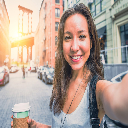

In [59]:
cv2_imshow(foto_prueba)

In [60]:
foto_prueba = foto_prueba.reshape(1,128,128,3)

In [61]:
pred = model.predict(foto_prueba)


In [62]:
pred

array([[20.49179]], dtype=float32)